In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df1 = pd.read_csv('df1_modified.csv')
df2 = pd.read_csv('df2_modified.csv')
df3 = pd.read_csv('df3_modified.csv')


In [3]:
df_concat = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
df_concat

,underlying_symbol,quote_datetime,root,expiration,strike,option_type,open,high,low,close,...,implied_volatility,delta,gamma,theta,vega,rho,open_interest,risk_free_rate,time_to_maturity,option_price
0,^SPX,2024-07-26 10:30:00,SPX,2024-08-16,200.0,C,0.0,0.0,0.0,0.0,...,5.4324,0.9995,0.0000,0.0,0.0314,-0.0047,24,5.49,0.083333,5250.00
1,^SPX,2024-07-26 11:30:00,SPX,2024-08-16,200.0,C,0.0,0.0,0.0,0.0,...,5.0932,0.9997,0.0000,0.0,0.0202,-0.0117,24,5.49,0.083333,5245.90
2,^SPX,2024-07-26 12:30:00,SPX,2024-08-16,200.0,C,0.0,0.0,0.0,0.0,...,4.9448,0.9998,0.0000,0.0,0.0160,-0.0184,24,5.49,0.083333,5269.65
3,^SPX,2024-07-26 13:30:00,SPX,2024-08-16,200.0,C,0.0,0.0,0.0,0.0,...,4.8580,1.0000,0.0000,0.0,0.0141,-0.0210,24,5.49,0.083333,5284.75
4,^SPX,2024-07-26 14:30:00,SPX,2024-08-16,200.0,C,0.0,0.0,0.0,0.0,...,4.2050,1.0000,0.0000,0.0,0.0034,-0.0269,24,5.49,0.083333,5258.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513725,^SPX,2024-09-27 12:30:00,SPXW,2025-09-30,7800.0,P,0.0,0.0,0.0,0.0,...,0.1322,-0.9816,0.0001,0.0,3.6619,-74.5091,2,3.55,1.460317,1794.85
513726,^SPX,2024-09-27 13:30:00,SPXW,2025-09-30,7800.0,P,0.0,0.0,0.0,0.0,...,0.1304,-0.9837,0.0001,0.0,3.4177,-74.6205,2,3.55,1.460317,1799.45
513727,^SPX,2024-09-27 14:30:00,SPXW,2025-09-30,7800.0,P,0.0,0.0,0.0,0.0,...,0.1302,-0.9844,0.0001,0.0,3.3423,-74.6503,2,3.55,1.460317,1804.95
513728,^SPX,2024-09-27 15:30:00,SPXW,2025-09-30,7800.0,P,0.0,0.0,0.0,0.0,...,0.1301,-0.9837,0.0001,0.0,3.4058,-74.6146,2,3.55,1.460317,1797.75


In [4]:
#split based on root
df_SPX = df_concat[df_concat['root'] == 'SPX']
df_SPXW = df_concat[df_concat['root'] == 'SPXW']

In [5]:
#split based on calls and puts
df_SPX_calls = df_SPX[df_SPX['option_type'] == 'C']
df_SPX_puts = df_SPX[df_SPX['option_type'] == 'P']
df_SPXW_calls = df_SPXW[df_SPXW['option_type'] == 'C']
df_SPXW_puts = df_SPXW[df_SPXW['option_type'] == 'P']

In [6]:
df_SPXW_calls.shape

(173922, 29)

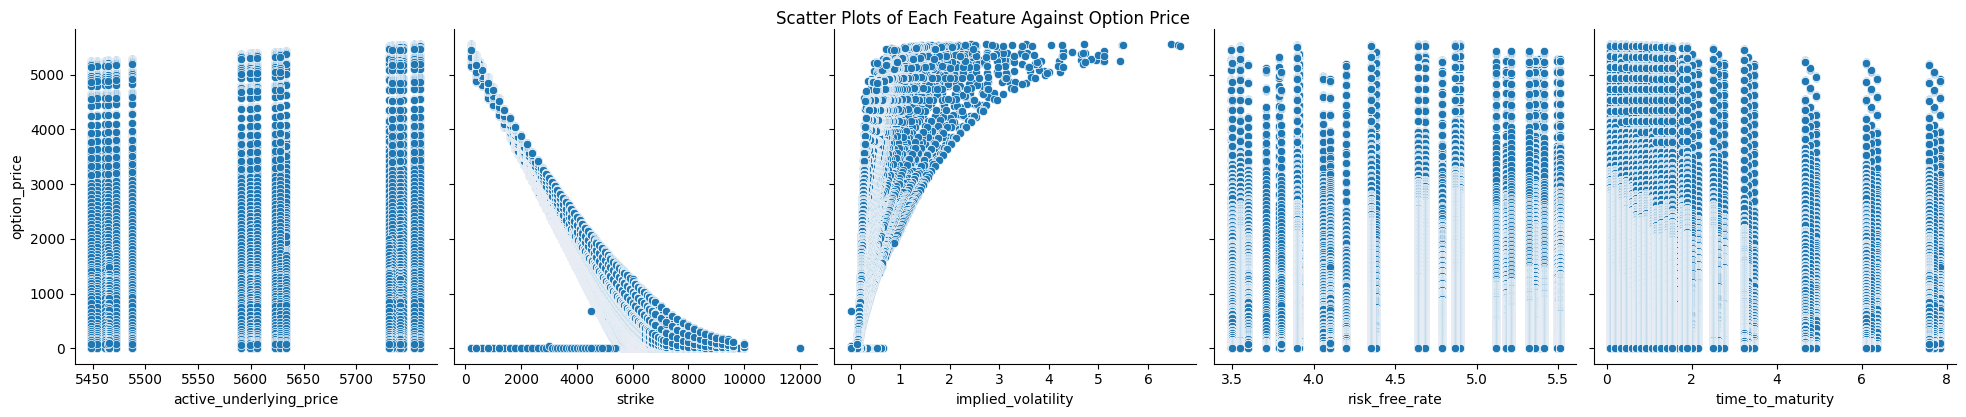

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with X and y for easier plotting
data = df_SPX_calls[['active_underlying_price', 'strike', 'implied_volatility', 'risk_free_rate', 'time_to_maturity']].copy()
data['option_price'] = df_SPX_calls['option_price']

# Plot each feature in X against y using Seaborn's pairplot
sns.pairplot(data, x_vars=['active_underlying_price', 'strike', 'implied_volatility', 'risk_free_rate', 'time_to_maturity'], 
             y_vars='option_price', height=4, aspect=1, kind="scatter")

# Display the plot
plt.suptitle('Scatter Plots of Each Feature Against Option Price', y=1.02)  # Adds a title with some vertical spacing
plt.show()


# Test C, gamma using GridSearchCV

In [ ]:
#input parameters: spot price, exercise price, rf rate, maturity, implied votality
#y: option price

### test all C and gamma: scale, auto

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV


X = df_SPX_calls[['active_underlying_price', 'strike', 'implied_volatility', 'risk_free_rate', 'time_to_maturity']]
y = df_SPX_calls['option_price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVR model with RBF (Gaussian) kernel
svr = SVR(kernel='rbf')
param_grid = {"C":[0.1, 1, 10, 100,1000], "gamma":['scale', 'auto']} #tested with other C, (<1000) and gamma - auto, feel free to test more

clf = GridSearchCV(svr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=3)

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print(clf.best_params_)

print(f"Best score (negative RMSE): {clf.best_score_}")

### final test

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV


X = df_SPX_calls[['active_underlying_price', 'strike', 'implied_volatility', 'risk_free_rate', 'time_to_maturity']]
y = df_SPX_calls['option_price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVR model with RBF (Gaussian) kernel
svr = SVR(kernel='rbf')
param_grid = {"C":[100,1000], "gamma":['scale']} #tested with other C, (<1000) and gamma - auto, feel free to test more

clf = GridSearchCV(svr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=3)

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print(clf.best_params_)

print(f"Best score (negative RMSE): {clf.best_score_}")

{'C': 1000, 'gamma': 'scale'}
Best score (negative RMSE): -21.640804506150857


# SPX_CALLS

## testing epsilon 0.01

In [9]:
X = df_SPX_calls[['active_underlying_price', 'strike', 'implied_volatility', 'risk_free_rate', 'time_to_maturity']]
y = df_SPX_calls['option_price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=1000, gamma='scale', epsilon=0.01)

# Train the model
svr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('RMSE: ',np.sqrt(mse))
# Compare predicted prices with actual prices
print(f'Predicted prices: {y_pred}')
print(f'Actual prices: {y_test.values}')

Mean Squared Error: 295.70288565121143
RMSE:  17.196013655821847
Predicted prices: [ 30.00578421   1.24494922 570.4348188  ... 514.58331958 609.26937318
 143.25748978]
Actual prices: [ 20.9    1.15 568.4  ... 513.2  609.1  142.7 ]


# default epsilon (use this)

In [15]:
X = df_SPX_calls[['active_underlying_price', 'strike', 'implied_volatility', 'risk_free_rate', 'time_to_maturity']]
y = df_SPX_calls['option_price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=1000, gamma='scale')

# Train the model
svr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print('RMSE: ',np.sqrt(mse))
# Compare predicted prices with actual prices
print(f'Predicted prices: {y_pred}')
print(f'Actual prices: {y_test.values}')

Mean Squared Error: 295.75422223653766
Mean Absolute Error: 4.54637578992605
Mean Squared Error: 295.75422223653766
RMSE:  17.197506279590005
Predicted prices: [ 30.04040361   1.25079069 570.44105077 ... 514.62031104 609.20685884
 143.2792788 ]
Actual prices: [ 20.9    1.15 568.4  ... 513.2  609.1  142.7 ]


# SPX PUTS

## Test epsilon 0.01, negliblie diff so stick to default epsilon (0.1)

In [10]:
X = df_SPX_puts[['active_underlying_price', 'strike', 'implied_volatility', 'risk_free_rate', 'time_to_maturity']]
y = df_SPX_puts['option_price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=1000, gamma='scale', epsilon= 0.01)

# Train the model
svr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('RMSE: ',np.sqrt(mse))
print(f"Test R^2: {r2_test}")
# Compare predicted prices with actual prices
print(f'Predicted prices: {y_pred}')
print(f'Actual prices: {y_test.values}')

Mean Squared Error: 1940.3441614460926
RMSE:  44.049337809393826
Test R^2: 0.9949734620439413
Predicted prices: [ 168.70221208 3229.48887091  111.26279604 ...  783.09357216 1156.06989677
 1555.97591496]
Actual prices: [ 159.85 3193.25  112.5  ...  780.   1153.7  1524.  ]


## default

In [16]:
X = df_SPX_puts[['active_underlying_price', 'strike', 'implied_volatility', 'risk_free_rate', 'time_to_maturity']]
y = df_SPX_puts['option_price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=1000, gamma='scale')

# Train the model
svr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print('RMSE: ',np.sqrt(mse))
# Compare predicted prices with actual prices
print(f'Predicted prices: {y_pred}')
print(f'Actual prices: {y_test.values}')

Mean Squared Error: 1938.5695626453094
Mean Absolute Error: 4.582340595355673
Mean Squared Error: 1938.5695626453094
RMSE:  44.029189893130095
Predicted prices: [ 168.64071822 3229.3813415   111.26213704 ...  783.0519008  1155.98091234
 1555.98541881]
Actual prices: [ 159.85 3193.25  112.5  ...  780.   1153.7  1524.  ]


# SPXW CALLS

In [17]:
X = df_SPXW_calls[['active_underlying_price', 'strike', 'implied_volatility', 'risk_free_rate', 'time_to_maturity']]
y = df_SPXW_calls['option_price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=1000, gamma='scale')

# Train the model
svr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print('RMSE: ',np.sqrt(mse))
# Compare predicted prices with actual prices
print(f'Predicted prices: {y_pred}')
print(f'Actual prices: {y_test.values}')

Mean Squared Error: 290.94944907723124
Mean Absolute Error: 6.786562562376812
Mean Squared Error: 290.94944907723124
RMSE:  17.0572403710926
Predicted prices: [1344.77110065  353.91903124  223.16391531 ... 2041.79258174  131.24653107
  131.98034384]
Actual prices: [1347.3   354.05  227.7  ... 2035.15  121.45  127.7 ]


# SPXW PUTS

In [12]:
X = df_SPXW_puts[['active_underlying_price', 'strike', 'implied_volatility', 'risk_free_rate', 'time_to_maturity']]
y = df_SPXW_puts['option_price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=1000, gamma='scale')

# Train the model
svr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('RMSE: ',np.sqrt(mse))
print(f'Mean Absolute Error: {mae}')
print(f'R2: {r2}')
# Compare predicted prices with actual prices
print(f'Predicted prices: {y_pred}')
print(f'Actual prices: {y_test.values}')

NameError: name 'y_true' is not defined

## Ignore error on top, metrics below

In [14]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('RMSE: ',np.sqrt(mse))
print(f'Mean Absolute Error: {mae}')
print(f'R2: {r2}')

Mean Squared Error: 178.82624422575017
RMSE:  13.372593025503699
Mean Absolute Error: 5.292797005524392
R2: 0.9980576682693363
